# White Blood Cell Classification using Convolutional Neural Networks


<b>Gurraj Atwal</b><br>
<b>Sirish Prabakar</b>

### Table of Contents
1. Dataset<br>
    1.1. Import<br>
    1.2. Create X and y<br>
    1.3. Normalize images<br>
    1.4. Train-validation-test stratified split<br>
    1.5. Balance categories<br>
    1.6. Data augmentation
2. Multilayer Perceptron (MLP)<br>
    2.1. Design<br>
    2.2. Fit<br>
    2.3. Predict<br>
    2.4. Results
3. Convolutional Neural Network (CNN)<br>
    3.1. Design<br>
    3.2. Fit<br>
    3.3. Predict<br>
    3.4. Results
4. Transfer Learning (TL)<br>
    4.1. Design<br>
    4.2. Fit<br>
    4.3. Predict<br>
    4.4. Results
5. Analysis    

### 1. Dataset

#### 1.1. Import

In [1]:
import pandas as pd

DATASET_PATH = "datasets/blood-cells/dataset-master/dataset-master/"

labels_csv = pd.read_csv(DATASET_PATH + "labels.csv")
labels_csv = labels_csv.dropna(how='all', axis=1)
labels_csv = labels_csv.dropna()
labels_csv.sample(5)

,Image,Category
339,339,NEUTROPHIL
2,2,NEUTROPHIL
301,301,NEUTROPHIL
390,390,NEUTROPHIL
322,322,NEUTROPHIL


In [2]:
labels_csv["Category"].value_counts()

NEUTROPHIL                207
EOSINOPHIL                 88
LYMPHOCYTE                 33
MONOCYTE                   21
NEUTROPHIL, NEUTROPHIL      3
BASOPHIL                    3
NEUTROPHIL, EOSINOPHIL      2
NEUTROPHIL,EOSINOPHIL       1
EOSINOPHIL, EOSINOPHIL      1
EOSINOPHIL,EOSINOPHIL       1
NEUTROPHIL, MONOCYTE        1
NEUTROPHIL, LYMPHOCYTE      1
LYMPHOCYTE, LYMPHOCYTE      1
MONOCYTE, LYMPHOCYTE        1
NEUTROPHIL,NEUTROPHIL       1
NEUTROPHIL,BASOPHIL         1
EOSINOPHIL, LYMPHOCYTE      1
Name: Category, dtype: int64

In [3]:
labels_csv = labels_csv[~labels_csv["Category"].str.contains(',')]
labels_csv = labels_csv[labels_csv["Category"] != "BASOPHIL"]
labels_csv["Category"].value_counts()

NEUTROPHIL    207
EOSINOPHIL     88
LYMPHOCYTE     33
MONOCYTE       21
Name: Category, dtype: int64

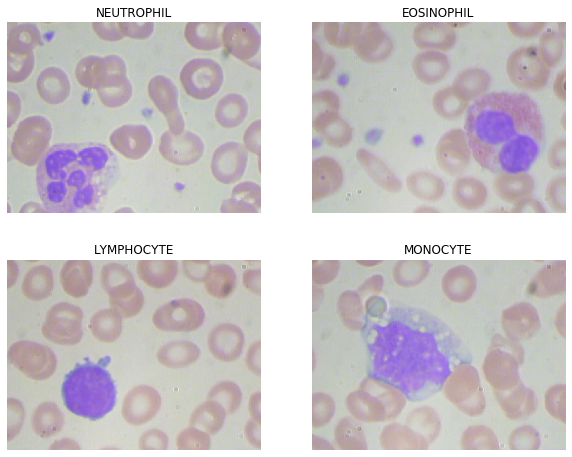

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def get_image_path(dataset_path, image_number):
    image_filename = "BloodImage_" + str(image_number).zfill(5) + ".jpg"
    return dataset_path + "JPEGImages/" + image_filename

def plot_category_sample(labels_csv, category):
    row = labels_csv[labels_csv["Category"] == category].iloc[-1]
    image_path = get_image_path(DATASET_PATH, row["Image"])
    image = cv2.imread(image_path)
    image = image[:, :, [2, 1, 0]]
    plt.imshow(image)
    plt.title(category)
    plt.axis("off")

plt.figure(figsize=(10, 8))
plt.subplot(221)
plot_category_sample(labels_csv, "NEUTROPHIL")
plt.subplot(222)
plot_category_sample(labels_csv, "EOSINOPHIL")
plt.subplot(223)
plot_category_sample(labels_csv, "LYMPHOCYTE")
plt.subplot(224)
plot_category_sample(labels_csv, "MONOCYTE")

#### 1.2. Create X and y

X shape: (347, 120, 160, 3) 
y shape: (347, 4)


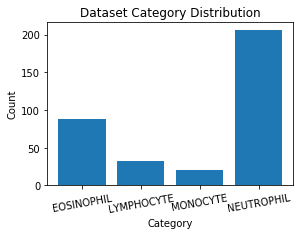

In [5]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

X = []
y = []
for _, row in labels_csv.iterrows():
    image_path = get_image_path(DATASET_PATH, row["Image"])
    image = cv2.imread(image_path)
    if image is not None:
        resized_image = cv2.resize(image, (160, 120))
        X.append(np.array(resized_image))
        y.append(row["Category"])

X = np.array(X)
category_encoder = OneHotEncoder()
y = category_encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()
print("X shape:", X.shape, "\ny shape:", y.shape)

def plot_unique_counts(arr, title):
    unique, counts = np.unique(arr, return_counts=True)
    bars = plt.bar(unique, counts)
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.xticks(rotation=10)
    plt.title(title)
    
plt.figure(figsize=(15, 3))
plt.subplot(131)
plot_unique_counts(category_encoder.inverse_transform(y).ravel(),
                   "Dataset Category Distribution")

#### 1.3. Normalize images

In [6]:
normalize_pixels = lambda p: p/255.
X = normalize_pixels(X)

#### 1.4. Train-validation-test stratified split

X_train shape: (221, 120, 160, 3) 
y_train shape: (221, 4) 

X_validation shape: (56, 120, 160, 3) 
y_validation shape: (56, 4) 

X_test shape: (70, 120, 160, 3) 
y_test shape: (70, 4)


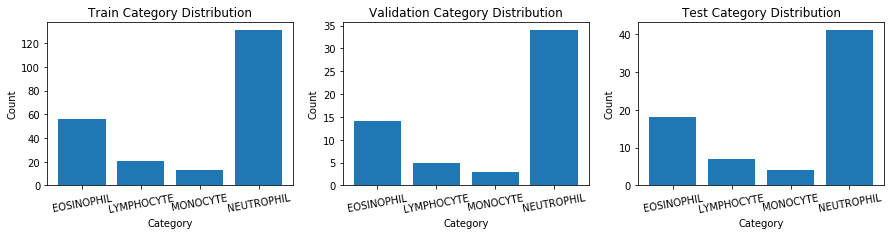

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,
                                                                          y,
                                                                          stratify=y,
                                                                          test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,
                                                                y_train_validation,
                                                                stratify=y_train_validation,
                                                                test_size=0.2)

print("X_train shape:", X_train.shape,
      "\ny_train shape:", y_train.shape,
      "\n\nX_validation shape:", X_validation.shape,
      "\ny_validation shape:", y_validation.shape,
      "\n\nX_test shape:", X_test.shape,
      "\ny_test shape:", y_test.shape)

plt.figure(figsize=(15, 3))
plt.subplot(131)
plot_unique_counts(category_encoder.inverse_transform(y_train).ravel(),
                   "Train Category Distribution")
plt.subplot(132)
plot_unique_counts(category_encoder.inverse_transform(y_validation).ravel(),
                   "Validation Category Distribution")
plt.subplot(133)
plot_unique_counts(category_encoder.inverse_transform(y_test).ravel(),
                   "Test Category Distribution")

#### 1.5. Balance categories

X_train shape: (524, 120, 160, 3) 
y_train shape: (524, 4) 

X_validation shape: (56, 120, 160, 3) 
y_validation shape: (56, 4) 

X_test shape: (70, 120, 160, 3) 
y_test shape: (70, 4)


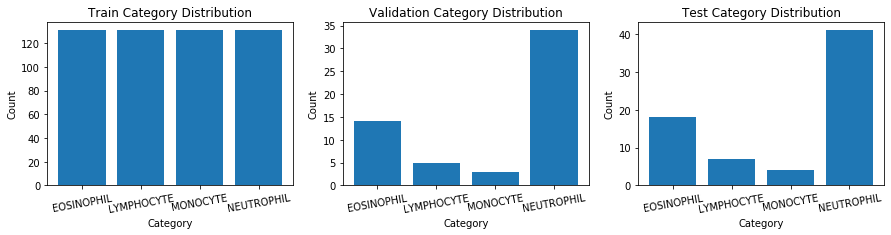

In [8]:
from sklearn.utils import resample
import random

def balance(X, y):
    grouped_by_category = {}
    for index, sample in enumerate(X):
        category = y[index]
        if category in grouped_by_category:
            grouped_by_category[category].append(sample)
        else:
            grouped_by_category[category] = [sample]
 
    dominant_category = max(grouped_by_category.keys(),
                            key=lambda k: len(grouped_by_category[k]))
    max_count = len(grouped_by_category[dominant_category])
    for category in grouped_by_category.keys():
        if category == dominant_category: continue
        samples = grouped_by_category[category]
        if len(samples) < max_count:
            oversampled_samples = resample(samples, replace=True, n_samples=max_count)
            grouped_by_category[category] = oversampled_samples

    X = []
    y = []
    for category in grouped_by_category.keys():
        samples = grouped_by_category[category]
        X.extend(samples)
        y.extend(np.repeat(category, len(samples)))
    
    X_and_y = list(zip(X, y))
    random.shuffle(X_and_y)
    X, y = zip(*X_and_y)
    return np.array(X), np.array(y)

X_train, y_train = balance(X_train, category_encoder.inverse_transform(y_train).ravel())
y_train = category_encoder.transform(y_train.reshape(-1, 1)).toarray()

print("X_train shape:", X_train.shape,
      "\ny_train shape:", y_train.shape,
      "\n\nX_validation shape:", X_validation.shape,
      "\ny_validation shape:", y_validation.shape,
      "\n\nX_test shape:", X_test.shape,
      "\ny_test shape:", y_test.shape)

plt.figure(figsize=(15, 3))
plt.subplot(131)
plot_unique_counts(category_encoder.inverse_transform(y_train).ravel(),
                   "Train Category Distribution")
plt.subplot(132)
plot_unique_counts(category_encoder.inverse_transform(y_validation).ravel(),
                   "Validation Category Distribution")
plt.subplot(133)
plot_unique_counts(category_encoder.inverse_transform(y_test).ravel(),
                   "Test Category Distribution")

#### 1.6. Data augmentation

In [9]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 8
train_data_generator = ImageDataGenerator(rotation_range=30,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          fill_mode="constant")

train_generator = train_data_generator.flow(X_train,
                                            y_train,
                                            batch_size=BATCH_SIZE)

Using TensorFlow backend.


### 2. Multilayer Perceptron (MLP)

#### 2.1. Design

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import plot_model

mlp = Sequential()

mlp.add(Dense(16, activation="relu", input_shape=(120, 160, 3)))
mlp.add(Dense(32, activation="relu"))
mlp.add(Dense(64, activation="relu"))

mlp.add(Flatten())
mlp.add(Dense(4, activation="softmax"))
mlp.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120, 160, 16)      64        
_________________________________________________________________
dense_2 (Dense)              (None, 120, 160, 32)      544       
_________________________________________________________________
dense_3 (Dense)              (None, 120, 160, 64)      2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1228800)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 4915204   
Total params: 4,917,924
Trainable params: 4,917,924
Non-trainable params: 0
_________________________________________________________________


#### 2.2. Fit

In [11]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(filepath="best_mlp_weights.hdf5", save_best_only=True)
mlp_history = mlp.fit_generator(train_generator,
                                steps_per_epoch=train_generator.n // BATCH_SIZE,
                                epochs=500,
                                validation_data=(X_validation, y_validation),
                                callbacks=[model_checkpoint])
mlp.load_weights("best_mlp_weights.hdf5")

Epoch 1/500
65/65 [==============================] - 2s 36ms/step - loss: 4.7519 - accuracy: 0.2190 - val_loss: 1.6013 - val_accuracy: 0.1786
Epoch 2/500
65/65 [==============================] - 2s 31ms/step - loss: 1.3695 - accuracy: 0.3372 - val_loss: 1.2300 - val_accuracy: 0.5179
Epoch 3/500
65/65 [==============================] - 2s 32ms/step - loss: 1.2881 - accuracy: 0.3760 - val_loss: 1.5040 - val_accuracy: 0.3036
Epoch 4/500
65/65 [==============================] - 2s 31ms/step - loss: 1.2111 - accuracy: 0.4632 - val_loss: 1.4996 - val_accuracy: 0.1964
Epoch 5/500
65/65 [==============================] - 2s 31ms/step - loss: 1.1920 - accuracy: 0.4554 - val_loss: 1.4470 - val_accuracy: 0.1250
Epoch 6/500
65/65 [==============================] - 2s 31ms/step - loss: 1.1493 - accuracy: 0.5039 - val_loss: 1.2375 - val_accuracy: 0.4464
Epoch 7/500
65/65 [==============================] - 2s 31ms/step - loss: 1.1269 - accuracy: 0.4845 - val_loss: 1.4115 - val_accuracy: 0.1786
Epoch 

65/65 [==============================] - 2s 31ms/step - loss: 0.6186 - accuracy: 0.7519 - val_loss: 0.7022 - val_accuracy: 0.6607
Epoch 59/500
65/65 [==============================] - 2s 31ms/step - loss: 0.5890 - accuracy: 0.7655 - val_loss: 0.7900 - val_accuracy: 0.6786
Epoch 60/500
65/65 [==============================] - 2s 31ms/step - loss: 0.5625 - accuracy: 0.7907 - val_loss: 0.8228 - val_accuracy: 0.6429
Epoch 61/500
65/65 [==============================] - 2s 31ms/step - loss: 0.6049 - accuracy: 0.7500 - val_loss: 0.8271 - val_accuracy: 0.5714
Epoch 62/500
65/65 [==============================] - 2s 31ms/step - loss: 0.6708 - accuracy: 0.7229 - val_loss: 0.8902 - val_accuracy: 0.5714
Epoch 63/500
65/65 [==============================] - 2s 31ms/step - loss: 0.6384 - accuracy: 0.7345 - val_loss: 0.5442 - val_accuracy: 0.7321
Epoch 64/500
65/65 [==============================] - 2s 31ms/step - loss: 0.5577 - accuracy: 0.7733 - val_loss: 1.1512 - val_accuracy: 0.6071
Epoch 65/500

65/65 [==============================] - 2s 31ms/step - loss: 0.4610 - accuracy: 0.8019 - val_loss: 0.7383 - val_accuracy: 0.6607
Epoch 116/500
65/65 [==============================] - 2s 31ms/step - loss: 0.4005 - accuracy: 0.8372 - val_loss: 0.8338 - val_accuracy: 0.7321
Epoch 117/500
65/65 [==============================] - 2s 31ms/step - loss: 0.4554 - accuracy: 0.7984 - val_loss: 0.6799 - val_accuracy: 0.6964
Epoch 118/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3783 - accuracy: 0.8566 - val_loss: 0.6176 - val_accuracy: 0.8571
Epoch 119/500
65/65 [==============================] - 2s 31ms/step - loss: 0.4052 - accuracy: 0.8275 - val_loss: 0.5773 - val_accuracy: 0.7679
Epoch 120/500
65/65 [==============================] - 2s 31ms/step - loss: 0.4501 - accuracy: 0.8120 - val_loss: 0.9099 - val_accuracy: 0.5893
Epoch 121/500
65/65 [==============================] - 2s 31ms/step - loss: 0.4551 - accuracy: 0.8275 - val_loss: 0.6861 - val_accuracy: 0.6786
Epoch 

Epoch 172/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3645 - accuracy: 0.8430 - val_loss: 0.8566 - val_accuracy: 0.7321
Epoch 173/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3217 - accuracy: 0.8663 - val_loss: 0.7919 - val_accuracy: 0.8036
Epoch 174/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3772 - accuracy: 0.8398 - val_loss: 1.0625 - val_accuracy: 0.6429
Epoch 175/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3417 - accuracy: 0.8558 - val_loss: 0.7415 - val_accuracy: 0.7857
Epoch 176/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3161 - accuracy: 0.8721 - val_loss: 1.2411 - val_accuracy: 0.6786
Epoch 177/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3321 - accuracy: 0.8760 - val_loss: 0.8696 - val_accuracy: 0.8393
Epoch 178/500
65/65 [==============================] - 2s 31ms/step - loss: 0.2733 - accuracy: 0.8895 - val_loss: 0.8131 - val_accuracy:

Epoch 229/500
65/65 [==============================] - 2s 31ms/step - loss: 0.2664 - accuracy: 0.9121 - val_loss: 1.3829 - val_accuracy: 0.6607
Epoch 230/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3301 - accuracy: 0.8682 - val_loss: 1.1803 - val_accuracy: 0.7857
Epoch 231/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3837 - accuracy: 0.8442 - val_loss: 1.1361 - val_accuracy: 0.7500
Epoch 232/500
65/65 [==============================] - 2s 31ms/step - loss: 0.3218 - accuracy: 0.8652 - val_loss: 1.2620 - val_accuracy: 0.6964
Epoch 233/500
65/65 [==============================] - 2s 30ms/step - loss: 0.3078 - accuracy: 0.8857 - val_loss: 1.3684 - val_accuracy: 0.8036
Epoch 234/500
65/65 [==============================] - 2s 29ms/step - loss: 0.4161 - accuracy: 0.8430 - val_loss: 1.1931 - val_accuracy: 0.6964
Epoch 235/500
65/65 [==============================] - 2s 29ms/step - loss: 0.3027 - accuracy: 0.8712 - val_loss: 1.2870 - val_accuracy:

Epoch 286/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2654 - accuracy: 0.8857 - val_loss: 1.1367 - val_accuracy: 0.7143
Epoch 287/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2739 - accuracy: 0.8895 - val_loss: 1.2814 - val_accuracy: 0.7500
Epoch 288/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2636 - accuracy: 0.9058 - val_loss: 1.3907 - val_accuracy: 0.7500
Epoch 289/500
65/65 [==============================] - 2s 32ms/step - loss: 0.2799 - accuracy: 0.8945 - val_loss: 0.9312 - val_accuracy: 0.8214
Epoch 290/500
65/65 [==============================] - ETA: 0s - loss: 0.3069 - accuracy: 0.88 - 2s 29ms/step - loss: 0.3090 - accuracy: 0.8788 - val_loss: 1.3540 - val_accuracy: 0.6786
Epoch 291/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2474 - accuracy: 0.9121 - val_loss: 0.9944 - val_accuracy: 0.6964
Epoch 292/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2967 - accuracy:

65/65 [==============================] - 2s 29ms/step - loss: 0.3021 - accuracy: 0.8721 - val_loss: 1.3411 - val_accuracy: 0.7143
Epoch 343/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2842 - accuracy: 0.9012 - val_loss: 1.0251 - val_accuracy: 0.7143
Epoch 344/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2274 - accuracy: 0.9283 - val_loss: 1.2669 - val_accuracy: 0.7321
Epoch 345/500
65/65 [==============================] - 2s 29ms/step - loss: 0.3122 - accuracy: 0.8682 - val_loss: 1.3167 - val_accuracy: 0.7857
Epoch 346/500
65/65 [==============================] - 2s 30ms/step - loss: 0.3124 - accuracy: 0.8846 - val_loss: 1.3089 - val_accuracy: 0.7857
Epoch 347/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2523 - accuracy: 0.9082 - val_loss: 0.7135 - val_accuracy: 0.7500
Epoch 348/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2299 - accuracy: 0.9147 - val_loss: 0.7946 - val_accuracy: 0.8036
Epoch 

Epoch 399/500
65/65 [==============================] - 2s 31ms/step - loss: 0.2265 - accuracy: 0.9050 - val_loss: 1.4293 - val_accuracy: 0.6786
Epoch 400/500
65/65 [==============================] - 2s 31ms/step - loss: 0.2321 - accuracy: 0.9147 - val_loss: 1.4424 - val_accuracy: 0.7500
Epoch 401/500
65/65 [==============================] - 2s 31ms/step - loss: 0.2159 - accuracy: 0.9167 - val_loss: 1.6254 - val_accuracy: 0.7500
Epoch 402/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2540 - accuracy: 0.8934 - val_loss: 1.2538 - val_accuracy: 0.6964
Epoch 403/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2383 - accuracy: 0.9070 - val_loss: 1.3437 - val_accuracy: 0.6964
Epoch 404/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2672 - accuracy: 0.8992 - val_loss: 1.8807 - val_accuracy: 0.6607
Epoch 405/500
65/65 [==============================] - 2s 30ms/step - loss: 0.2789 - accuracy: 0.8915 - val_loss: 1.6254 - val_accuracy:

Epoch 456/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2609 - accuracy: 0.8973 - val_loss: 1.0770 - val_accuracy: 0.8036
Epoch 457/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2166 - accuracy: 0.9302 - val_loss: 1.5001 - val_accuracy: 0.6786
Epoch 458/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2527 - accuracy: 0.8992 - val_loss: 1.5327 - val_accuracy: 0.6964
Epoch 459/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2520 - accuracy: 0.9031 - val_loss: 1.5130 - val_accuracy: 0.6964
Epoch 460/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2269 - accuracy: 0.8934 - val_loss: 2.6715 - val_accuracy: 0.7143
Epoch 461/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2858 - accuracy: 0.8702 - val_loss: 2.0492 - val_accuracy: 0.7679
Epoch 462/500
65/65 [==============================] - 2s 29ms/step - loss: 0.2341 - accuracy: 0.9050 - val_loss: 1.1405 - val_accuracy:

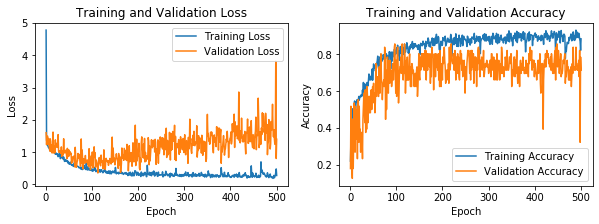

In [12]:
def plot_loss(history):
    loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, validation_loss, label="Validation Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")

def plot_accuracy(history):
    accuracy = history.history["accuracy"]
    validation_accuracy = history.history["val_accuracy"]
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, validation_accuracy, label="Validation Accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")

plt.figure(figsize=(10, 3))
plt.subplot(121)
plot_loss(mlp_history)
plt.subplot(122)
plot_accuracy(mlp_history)

#### 2.3. Predict

In [13]:
mlp_predicted = mlp.predict(X_test)

#### 2.4. Results

Accuracy Score
0.8571428571428571

Classification Report
              precision    recall  f1-score   support

  EOSINOPHIL       0.80      0.89      0.84        18
  LYMPHOCYTE       0.75      0.86      0.80         7
    MONOCYTE       1.00      0.50      0.67         4
  NEUTROPHIL       0.90      0.88      0.89        41

    accuracy                           0.86        70
   macro avg       0.86      0.78      0.80        70
weighted avg       0.86      0.86      0.86        70



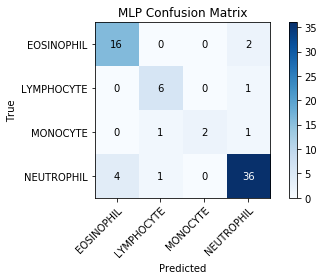

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_test_decoded = category_encoder.inverse_transform(y_test)
mlp_predicted_decoded = category_encoder.inverse_transform(mlp_predicted)

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylim=(cm.shape[1] - 0.5, -0.5),
           title=title,
           ylabel='True',
           xlabel='Predicted')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

print("Accuracy Score")
print(accuracy_score(y_test_decoded, mlp_predicted_decoded))
print("\nClassification Report")
print(classification_report(y_test_decoded, mlp_predicted_decoded))
plot_confusion_matrix(y_test_decoded,
                      mlp_predicted_decoded,
                      category_encoder.categories_[0],
                      "MLP Confusion Matrix")

### 3. Convolutional Neural Network (CNN)

#### 3.1. Design

In [15]:
from keras.layers import BatchNormalization, Conv2D, MaxPool2D, Dropout

cnn = Sequential()

cnn.add(BatchNormalization(input_shape=(120, 160, 3)))

cnn.add(Conv2D(64, 8, padding="same", activation="relu", strides=2))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=3, padding="same", strides=2))
cnn.add(Dropout(0.5))

cnn.add(Conv2D(128, 4, padding="same", activation="relu", strides=2))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=3, padding="same", strides=2))
cnn.add(Dropout(0.5))

cnn.add(Conv2D(256, 4, padding="same", activation="relu", strides=2))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=3, padding="same", strides=2))
cnn.add(Dropout(0.5))

cnn.add(Flatten())
cnn.add(Dense(4, activation="softmax"))
cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 120, 160, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 80, 64)        12352     
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 80, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 40, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 40, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 20, 128)       131200    
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 20, 128)      

#### 3.2. Fit

In [16]:
model_checkpoint = ModelCheckpoint(filepath="best_cnn_weights.hdf5", save_best_only=True)
cnn_history = cnn.fit_generator(train_generator,
                                steps_per_epoch=train_generator.n // BATCH_SIZE,
                                epochs=500,
                                validation_data=(X_validation, y_validation),
                                callbacks=[model_checkpoint])
cnn.load_weights("best_cnn_weights.hdf5")

Epoch 1/500
65/65 [==============================] - 3s 41ms/step - loss: 3.5476 - accuracy: 0.2771 - val_loss: 3.4435 - val_accuracy: 0.0893
Epoch 2/500
65/65 [==============================] - 1s 20ms/step - loss: 2.9897 - accuracy: 0.3043 - val_loss: 1.0859 - val_accuracy: 0.5893
Epoch 3/500
65/65 [==============================] - 1s 19ms/step - loss: 2.8105 - accuracy: 0.2984 - val_loss: 1.4821 - val_accuracy: 0.5000
Epoch 4/500
65/65 [==============================] - 1s 21ms/step - loss: 2.3808 - accuracy: 0.2965 - val_loss: 2.8005 - val_accuracy: 0.0714
Epoch 5/500
65/65 [==============================] - 1s 19ms/step - loss: 2.2930 - accuracy: 0.3469 - val_loss: 2.7673 - val_accuracy: 0.0893
Epoch 6/500
65/65 [==============================] - 1s 18ms/step - loss: 2.3225 - accuracy: 0.3217 - val_loss: 1.3774 - val_accuracy: 0.3750
Epoch 7/500
65/65 [==============================] - 1s 18ms/step - loss: 2.2430 - accuracy: 0.3275 - val_loss: 1.8719 - val_accuracy: 0.1429
Epoch 

65/65 [==============================] - 1s 18ms/step - loss: 0.7799 - accuracy: 0.7306 - val_loss: 0.4792 - val_accuracy: 0.8214
Epoch 59/500
65/65 [==============================] - 1s 18ms/step - loss: 0.7505 - accuracy: 0.7016 - val_loss: 0.3366 - val_accuracy: 0.8929
Epoch 60/500
65/65 [==============================] - 1s 19ms/step - loss: 0.6629 - accuracy: 0.7578 - val_loss: 0.3461 - val_accuracy: 0.8750
Epoch 61/500
65/65 [==============================] - 1s 18ms/step - loss: 0.6089 - accuracy: 0.7674 - val_loss: 0.3002 - val_accuracy: 0.8750
Epoch 62/500
65/65 [==============================] - 1s 19ms/step - loss: 0.6113 - accuracy: 0.7558 - val_loss: 0.4922 - val_accuracy: 0.8571
Epoch 63/500
65/65 [==============================] - 1s 18ms/step - loss: 0.5910 - accuracy: 0.7655 - val_loss: 0.3008 - val_accuracy: 0.8571
Epoch 64/500
65/65 [==============================] - 1s 18ms/step - loss: 0.6401 - accuracy: 0.7578 - val_loss: 0.4195 - val_accuracy: 0.8571
Epoch 65/500

Epoch 115/500
65/65 [==============================] - 1s 18ms/step - loss: 0.4964 - accuracy: 0.8058 - val_loss: 0.5485 - val_accuracy: 0.8214
Epoch 116/500
65/65 [==============================] - 1s 18ms/step - loss: 0.4548 - accuracy: 0.8450 - val_loss: 0.3542 - val_accuracy: 0.8571
Epoch 117/500
65/65 [==============================] - 1s 18ms/step - loss: 0.4543 - accuracy: 0.8081 - val_loss: 0.4750 - val_accuracy: 0.8393
Epoch 118/500
65/65 [==============================] - 1s 20ms/step - loss: 0.3726 - accuracy: 0.8624 - val_loss: 0.4214 - val_accuracy: 0.8393
Epoch 119/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3539 - accuracy: 0.8682 - val_loss: 0.3856 - val_accuracy: 0.8571
Epoch 120/500
65/65 [==============================] - 1s 18ms/step - loss: 0.4872 - accuracy: 0.8164 - val_loss: 0.2510 - val_accuracy: 0.8929
Epoch 121/500
65/65 [==============================] - 1s 18ms/step - loss: 0.4381 - accuracy: 0.8269 - val_loss: 0.2543 - val_accuracy:

Epoch 172/500
65/65 [==============================] - 1s 19ms/step - loss: 0.4094 - accuracy: 0.8555 - val_loss: 0.4039 - val_accuracy: 0.8750
Epoch 173/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3400 - accuracy: 0.8798 - val_loss: 0.4439 - val_accuracy: 0.8036
Epoch 174/500
65/65 [==============================] - 1s 19ms/step - loss: 0.4741 - accuracy: 0.8365 - val_loss: 0.6125 - val_accuracy: 0.8036
Epoch 175/500
65/65 [==============================] - 1s 21ms/step - loss: 0.3578 - accuracy: 0.8721 - val_loss: 0.3637 - val_accuracy: 0.9107
Epoch 176/500
65/65 [==============================] - 1s 20ms/step - loss: 0.3218 - accuracy: 0.8818 - val_loss: 0.7214 - val_accuracy: 0.8393
Epoch 177/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3481 - accuracy: 0.8605 - val_loss: 0.3076 - val_accuracy: 0.8393
Epoch 178/500
65/65 [==============================] - 1s 18ms/step - loss: 0.4213 - accuracy: 0.8566 - val_loss: 0.3572 - val_accuracy:

Epoch 229/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3150 - accuracy: 0.8789 - val_loss: 0.1812 - val_accuracy: 0.9286
Epoch 230/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3234 - accuracy: 0.8973 - val_loss: 0.3145 - val_accuracy: 0.8929
Epoch 231/500
65/65 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.89 - 1s 19ms/step - loss: 0.2596 - accuracy: 0.8973 - val_loss: 0.2808 - val_accuracy: 0.9107
Epoch 232/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3074 - accuracy: 0.8779 - val_loss: 0.2485 - val_accuracy: 0.9286
Epoch 233/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3084 - accuracy: 0.8750 - val_loss: 0.2343 - val_accuracy: 0.9286
Epoch 234/500
65/65 [==============================] - 1s 18ms/step - loss: 0.3156 - accuracy: 0.8652 - val_loss: 0.4777 - val_accuracy: 0.8036
Epoch 235/500
65/65 [==============================] - 1s 19ms/step - loss: 0.3180 - accuracy:

65/65 [==============================] - 1s 18ms/step - loss: 0.2673 - accuracy: 0.8992 - val_loss: 0.3164 - val_accuracy: 0.8929
Epoch 286/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2806 - accuracy: 0.8906 - val_loss: 0.2281 - val_accuracy: 0.9464
Epoch 287/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2311 - accuracy: 0.8934 - val_loss: 0.2031 - val_accuracy: 0.9286
Epoch 288/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2667 - accuracy: 0.9050 - val_loss: 0.4307 - val_accuracy: 0.8036
Epoch 289/500
65/65 [==============================] - 1s 21ms/step - loss: 0.2696 - accuracy: 0.9031 - val_loss: 0.4775 - val_accuracy: 0.8393
Epoch 290/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2434 - accuracy: 0.9050 - val_loss: 0.3176 - val_accuracy: 0.8929
Epoch 291/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2505 - accuracy: 0.9128 - val_loss: 0.3750 - val_accuracy: 0.8929
Epoch 

Epoch 342/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2199 - accuracy: 0.9128 - val_loss: 0.2144 - val_accuracy: 0.8929
Epoch 343/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2675 - accuracy: 0.9199 - val_loss: 0.2508 - val_accuracy: 0.8929
Epoch 344/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2823 - accuracy: 0.8876 - val_loss: 0.3002 - val_accuracy: 0.8750
Epoch 345/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2675 - accuracy: 0.8973 - val_loss: 0.4086 - val_accuracy: 0.8393
Epoch 346/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2387 - accuracy: 0.9089 - val_loss: 0.3392 - val_accuracy: 0.8750
Epoch 347/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2715 - accuracy: 0.8702 - val_loss: 0.6318 - val_accuracy: 0.8393
Epoch 348/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2491 - accuracy: 0.9012 - val_loss: 0.3103 - val_accuracy:

Epoch 399/500
65/65 [==============================] - 1s 19ms/step - loss: 0.1603 - accuracy: 0.9419 - val_loss: 0.3173 - val_accuracy: 0.9107
Epoch 400/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2282 - accuracy: 0.9089 - val_loss: 0.2923 - val_accuracy: 0.8571
Epoch 401/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2216 - accuracy: 0.9167 - val_loss: 0.2563 - val_accuracy: 0.8929
Epoch 402/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2030 - accuracy: 0.9225 - val_loss: 0.1638 - val_accuracy: 0.9286
Epoch 403/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2040 - accuracy: 0.9419 - val_loss: 0.2333 - val_accuracy: 0.9643
Epoch 404/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2288 - accuracy: 0.9212 - val_loss: 0.2450 - val_accuracy: 0.9286
Epoch 405/500
65/65 [==============================] - 1s 18ms/step - loss: 0.1903 - accuracy: 0.9336 - val_loss: 0.1798 - val_accuracy:

Epoch 456/500
65/65 [==============================] - 1s 19ms/step - loss: 0.2408 - accuracy: 0.9128 - val_loss: 0.3846 - val_accuracy: 0.8571
Epoch 457/500
65/65 [==============================] - 1s 18ms/step - loss: 0.2410 - accuracy: 0.9186 - val_loss: 0.4079 - val_accuracy: 0.8393
Epoch 458/500
65/65 [==============================] - 1s 18ms/step - loss: 0.1868 - accuracy: 0.9205 - val_loss: 0.3037 - val_accuracy: 0.9107
Epoch 459/500
65/65 [==============================] - 1s 21ms/step - loss: 0.2027 - accuracy: 0.9128 - val_loss: 0.2174 - val_accuracy: 0.9107
Epoch 460/500
65/65 [==============================] - 1s 18ms/step - loss: 0.1610 - accuracy: 0.9341 - val_loss: 0.3217 - val_accuracy: 0.9107
Epoch 461/500
65/65 [==============================] - 1s 19ms/step - loss: 0.1644 - accuracy: 0.9457 - val_loss: 0.2467 - val_accuracy: 0.9286
Epoch 462/500
65/65 [==============================] - 1s 18ms/step - loss: 0.1598 - accuracy: 0.9438 - val_loss: 0.4901 - val_accuracy:

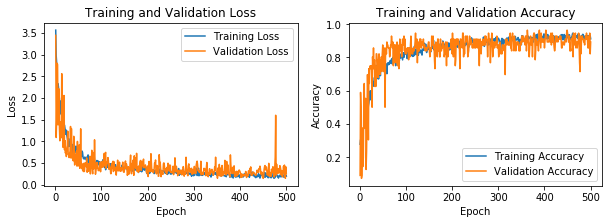

In [17]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plot_loss(cnn_history)
plt.subplot(122)
plot_accuracy(cnn_history)

#### 3.3. Predict

In [18]:
cnn_predicted = cnn.predict(X_test)

#### 3.4. Results

Accuracy Score
0.9428571428571428

Classification Report
              precision    recall  f1-score   support

  EOSINOPHIL       1.00      0.89      0.94        18
  LYMPHOCYTE       0.86      0.86      0.86         7
    MONOCYTE       0.75      0.75      0.75         4
  NEUTROPHIL       0.95      1.00      0.98        41

    accuracy                           0.94        70
   macro avg       0.89      0.87      0.88        70
weighted avg       0.94      0.94      0.94        70



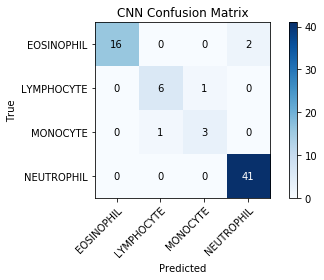

In [19]:
cnn_predicted_decoded = category_encoder.inverse_transform(cnn_predicted)
print("Accuracy Score")
print(accuracy_score(y_test_decoded, cnn_predicted_decoded))
print("\nClassification Report")
print(classification_report(y_test_decoded, cnn_predicted_decoded))
plot_confusion_matrix(y_test_decoded,
                      cnn_predicted_decoded,
                      category_encoder.categories_[0],
                      "CNN Confusion Matrix")

### 4. Transfer Learning (TL)

#### 4.1. Design

In [20]:
from keras.applications import VGG19

vgg19 = VGG19(include_top=False, input_shape=(120, 160, 3))
for layer in vgg19.layers:
    layer.trainable = False
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 40, 128)       0     

In [21]:
from keras.layers import GlobalAveragePooling2D

tl = Sequential()
tl.add(vgg19)

tl.add(GlobalAveragePooling2D())
tl.add(Dense(16, activation="relu"))
tl.add(Dropout(0.2))
tl.add(Dense(32, activation="relu"))
tl.add(Dense(64, activation="relu"))

tl.add(Dense(4, activation="softmax"))
tl.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
tl.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 5, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                8208      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                

In [22]:
print("Number of trainable weights:", len(tl.trainable_weights))

Number of trainable weights: 8


#### 4.2. Fit

In [23]:
model_checkpoint = ModelCheckpoint(filepath="best_tl_weights.hdf5", save_best_only=True)
tl_history = tl.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n // BATCH_SIZE,
                              epochs=500,
                              validation_data=(X_validation, y_validation),
                              callbacks=[model_checkpoint])
tl.load_weights("best_tl_weights.hdf5")

Epoch 1/500
65/65 [==============================] - 3s 40ms/step - loss: 1.3959 - accuracy: 0.2171 - val_loss: 1.4079 - val_accuracy: 0.0536
Epoch 2/500
65/65 [==============================] - 1s 21ms/step - loss: 1.3860 - accuracy: 0.2694 - val_loss: 1.3759 - val_accuracy: 0.1071
Epoch 3/500
65/65 [==============================] - 1s 23ms/step - loss: 1.3774 - accuracy: 0.3062 - val_loss: 1.3915 - val_accuracy: 0.1429
Epoch 4/500
65/65 [==============================] - 1s 23ms/step - loss: 1.3596 - accuracy: 0.3198 - val_loss: 1.4144 - val_accuracy: 0.0536
Epoch 5/500
65/65 [==============================] - 1s 22ms/step - loss: 1.3316 - accuracy: 0.3488 - val_loss: 1.3765 - val_accuracy: 0.1964
Epoch 6/500
65/65 [==============================] - 1s 23ms/step - loss: 1.2948 - accuracy: 0.3760 - val_loss: 1.3913 - val_accuracy: 0.1786
Epoch 7/500
65/65 [==============================] - 1s 22ms/step - loss: 1.3021 - accuracy: 0.3915 - val_loss: 1.3901 - val_accuracy: 0.1607
Epoch 

65/65 [==============================] - 1s 21ms/step - loss: 0.9354 - accuracy: 0.5814 - val_loss: 1.0310 - val_accuracy: 0.5714
Epoch 59/500
65/65 [==============================] - 1s 21ms/step - loss: 0.9836 - accuracy: 0.5465 - val_loss: 1.0358 - val_accuracy: 0.4821
Epoch 60/500
65/65 [==============================] - 1s 21ms/step - loss: 0.9615 - accuracy: 0.5543 - val_loss: 1.0065 - val_accuracy: 0.6429
Epoch 61/500
65/65 [==============================] - 1s 21ms/step - loss: 0.9605 - accuracy: 0.5833 - val_loss: 1.2371 - val_accuracy: 0.4821
Epoch 62/500
65/65 [==============================] - 1s 21ms/step - loss: 0.9772 - accuracy: 0.5659 - val_loss: 1.0592 - val_accuracy: 0.5893
Epoch 63/500
65/65 [==============================] - 1s 21ms/step - loss: 0.9250 - accuracy: 0.6047 - val_loss: 0.9924 - val_accuracy: 0.5893
Epoch 64/500
65/65 [==============================] - 1s 21ms/step - loss: 0.9372 - accuracy: 0.5833 - val_loss: 1.0600 - val_accuracy: 0.6250
Epoch 65/500

65/65 [==============================] - 1s 21ms/step - loss: 0.8671 - accuracy: 0.6589 - val_loss: 0.7938 - val_accuracy: 0.6607
Epoch 116/500
65/65 [==============================] - 1s 23ms/step - loss: 0.8698 - accuracy: 0.6298 - val_loss: 0.8878 - val_accuracy: 0.6607
Epoch 117/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8280 - accuracy: 0.6309 - val_loss: 0.8821 - val_accuracy: 0.6429
Epoch 118/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8328 - accuracy: 0.6385 - val_loss: 0.8790 - val_accuracy: 0.6607
Epoch 119/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7853 - accuracy: 0.6641 - val_loss: 0.7800 - val_accuracy: 0.7143
Epoch 120/500
65/65 [==============================] - 1s 21ms/step - loss: 0.8030 - accuracy: 0.6654 - val_loss: 0.8009 - val_accuracy: 0.6786
Epoch 121/500
65/65 [==============================] - 1s 21ms/step - loss: 0.8519 - accuracy: 0.6027 - val_loss: 0.9122 - val_accuracy: 0.6607
Epoch 

Epoch 172/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8419 - accuracy: 0.6543 - val_loss: 0.9414 - val_accuracy: 0.6250
Epoch 173/500
65/65 [==============================] - 2s 24ms/step - loss: 0.8405 - accuracy: 0.6453 - val_loss: 0.8364 - val_accuracy: 0.6607
Epoch 174/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8003 - accuracy: 0.6492 - val_loss: 0.8201 - val_accuracy: 0.6786
Epoch 175/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7627 - accuracy: 0.6577 - val_loss: 0.9925 - val_accuracy: 0.5714
Epoch 176/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8105 - accuracy: 0.6512 - val_loss: 0.8350 - val_accuracy: 0.6786
Epoch 177/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8150 - accuracy: 0.6531 - val_loss: 0.7235 - val_accuracy: 0.7679
Epoch 178/500
65/65 [==============================] - 1s 22ms/step - loss: 0.8517 - accuracy: 0.6172 - val_loss: 0.8227 - val_accuracy:

Epoch 229/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7935 - accuracy: 0.6562 - val_loss: 0.7535 - val_accuracy: 0.6607
Epoch 230/500
65/65 [==============================] - 2s 24ms/step - loss: 0.7452 - accuracy: 0.6764 - val_loss: 0.7874 - val_accuracy: 0.6786
Epoch 231/500
65/65 [==============================] - 2s 24ms/step - loss: 0.7673 - accuracy: 0.6667 - val_loss: 0.7868 - val_accuracy: 0.6607
Epoch 232/500
65/65 [==============================] - 2s 24ms/step - loss: 0.6982 - accuracy: 0.6827 - val_loss: 0.7200 - val_accuracy: 0.7143
Epoch 233/500
65/65 [==============================] - 2s 24ms/step - loss: 0.8052 - accuracy: 0.6609 - val_loss: 0.7563 - val_accuracy: 0.7143
Epoch 234/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7643 - accuracy: 0.6621 - val_loss: 0.6837 - val_accuracy: 0.7500
Epoch 235/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7741 - accuracy: 0.6725 - val_loss: 0.8661 - val_accuracy:

Epoch 286/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7842 - accuracy: 0.6725 - val_loss: 0.8173 - val_accuracy: 0.6786
Epoch 287/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7886 - accuracy: 0.6769 - val_loss: 0.8509 - val_accuracy: 0.5357
Epoch 288/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7451 - accuracy: 0.6797 - val_loss: 0.7340 - val_accuracy: 0.6964
Epoch 289/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7242 - accuracy: 0.7035 - val_loss: 0.7640 - val_accuracy: 0.6786
Epoch 290/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7546 - accuracy: 0.6705 - val_loss: 0.7163 - val_accuracy: 0.6786
Epoch 291/500
65/65 [==============================] - 1s 21ms/step - loss: 0.8771 - accuracy: 0.6105 - val_loss: 0.7284 - val_accuracy: 0.7500
Epoch 292/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7853 - accuracy: 0.6822 - val_loss: 0.8309 - val_accuracy:

65/65 [==============================] - 1s 21ms/step - loss: 0.7878 - accuracy: 0.6609 - val_loss: 0.9489 - val_accuracy: 0.5179
Epoch 343/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7570 - accuracy: 0.6802 - val_loss: 0.6775 - val_accuracy: 0.6786
Epoch 344/500
65/65 [==============================] - 1s 21ms/step - loss: 0.6973 - accuracy: 0.6880 - val_loss: 0.7008 - val_accuracy: 0.6607
Epoch 345/500
65/65 [==============================] - 2s 23ms/step - loss: 0.7547 - accuracy: 0.7151 - val_loss: 0.7647 - val_accuracy: 0.6964
Epoch 346/500
65/65 [==============================] - 2s 24ms/step - loss: 0.7313 - accuracy: 0.6783 - val_loss: 0.8003 - val_accuracy: 0.6786
Epoch 347/500
65/65 [==============================] - 2s 24ms/step - loss: 0.7066 - accuracy: 0.6938 - val_loss: 0.7445 - val_accuracy: 0.6964
Epoch 348/500
65/65 [==============================] - 2s 24ms/step - loss: 0.7506 - accuracy: 0.6667 - val_loss: 0.8923 - val_accuracy: 0.5536
Epoch 

Epoch 399/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7303 - accuracy: 0.7171 - val_loss: 0.6844 - val_accuracy: 0.6607
Epoch 400/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7316 - accuracy: 0.6957 - val_loss: 0.7776 - val_accuracy: 0.6786
Epoch 401/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7088 - accuracy: 0.7306 - val_loss: 0.8162 - val_accuracy: 0.6786
Epoch 402/500
65/65 [==============================] - 1s 23ms/step - loss: 0.7722 - accuracy: 0.6802 - val_loss: 0.7487 - val_accuracy: 0.6250
Epoch 403/500
65/65 [==============================] - ETA: 0s - loss: 0.7367 - accuracy: 0.69 - 1s 22ms/step - loss: 0.7314 - accuracy: 0.6977 - val_loss: 0.6944 - val_accuracy: 0.6786
Epoch 404/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7284 - accuracy: 0.7038 - val_loss: 0.7095 - val_accuracy: 0.6607
Epoch 405/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7561 - accuracy:

65/65 [==============================] - 1s 22ms/step - loss: 0.6836 - accuracy: 0.7151 - val_loss: 0.8226 - val_accuracy: 0.6429
Epoch 456/500
65/65 [==============================] - 2s 24ms/step - loss: 0.7504 - accuracy: 0.6977 - val_loss: 0.8804 - val_accuracy: 0.5893
Epoch 457/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7257 - accuracy: 0.7070 - val_loss: 0.7137 - val_accuracy: 0.6964
Epoch 458/500
65/65 [==============================] - 1s 22ms/step - loss: 0.6903 - accuracy: 0.7308 - val_loss: 0.7491 - val_accuracy: 0.6786
Epoch 459/500
65/65 [==============================] - 1s 21ms/step - loss: 0.7257 - accuracy: 0.7112 - val_loss: 0.8196 - val_accuracy: 0.6429
Epoch 460/500
65/65 [==============================] - 1s 22ms/step - loss: 0.7028 - accuracy: 0.7016 - val_loss: 0.6899 - val_accuracy: 0.7143
Epoch 461/500
65/65 [==============================] - 1s 21ms/step - loss: 0.6922 - accuracy: 0.7384 - val_loss: 0.7081 - val_accuracy: 0.7321
Epoch 

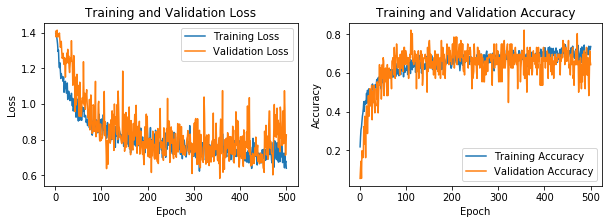

In [24]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plot_loss(tl_history)
plt.subplot(122)
plot_accuracy(tl_history)

#### 4.3. Predict

In [25]:
tl_predicted = tl.predict(X_test)

#### 4.4. Results

Accuracy Score
0.6428571428571429

Classification Report
              precision    recall  f1-score   support

  EOSINOPHIL       0.78      0.39      0.52        18
  LYMPHOCYTE       0.50      0.57      0.53         7
    MONOCYTE       0.15      0.50      0.24         4
  NEUTROPHIL       0.80      0.78      0.79        41

    accuracy                           0.64        70
   macro avg       0.56      0.56      0.52        70
weighted avg       0.73      0.64      0.66        70



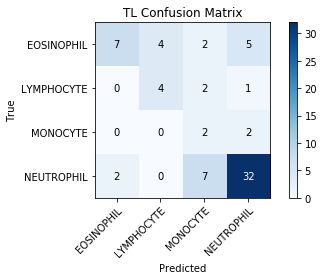

In [26]:
tl_predicted_decoded = category_encoder.inverse_transform(tl_predicted)
print("Accuracy Score")
print(accuracy_score(y_test_decoded, tl_predicted_decoded))
print("\nClassification Report")
print(classification_report(y_test_decoded, tl_predicted_decoded))
plot_confusion_matrix(y_test_decoded,
                      tl_predicted_decoded,
                      category_encoder.categories_[0],
                      "TL Confusion Matrix")

### 5. Analysis

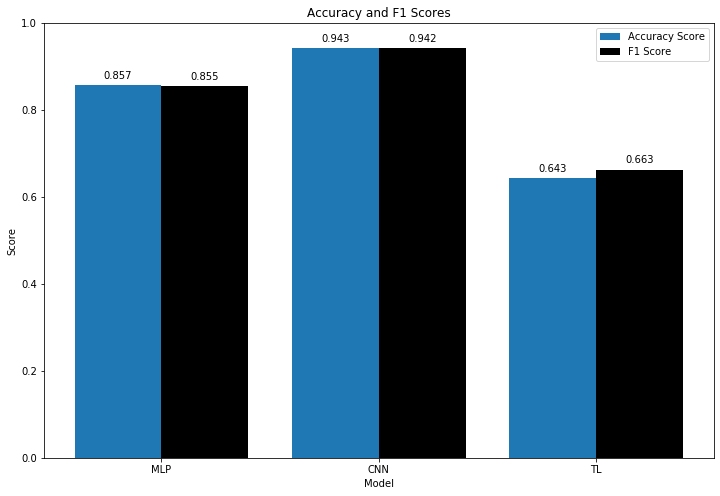

In [27]:
from sklearn.metrics import f1_score

models = ["MLP", "CNN", "TL"]
accuracy = [accuracy_score(y_test_decoded, mlp_predicted_decoded),
            accuracy_score(y_test_decoded, cnn_predicted_decoded),
            accuracy_score(y_test_decoded, tl_predicted_decoded)]
f1 = [f1_score(y_test_decoded, mlp_predicted_decoded, average="weighted"),
      f1_score(y_test_decoded, cnn_predicted_decoded, average="weighted"),
      f1_score(y_test_decoded, tl_predicted_decoded, average="weighted")]

indices = np.arange(3)
width = 0.4
plt.figure(figsize=(12, 8))
accuracy_bars = plt.bar(indices, accuracy,width, label="Accuracy Score")
f1_bars = plt.bar(indices + width, f1, width, label="F1 Score", color="black")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(indices + width / 2, models)
plt.title("Accuracy and F1 Scores")
plt.legend()

for bar in accuracy_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01,
             "%.3f" % height, ha="center", va="bottom")

for bar in f1_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01,
             "%.3f" % height, ha="center", va="bottom")

plt.show()